In [ ]:
pip install transformers tensorflow scikit-learn googletrans

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [ ]:
!pip install tensorflow --upgrade
!pip install transformers --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 752.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 28.2 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


**MALAYALAM**

**GRU MODEL**

Unique values in 'Label' column before encoding: ['Abusive' 'Non-Abusive']
Unique values in 'Label' column after encoding: [1 0]
No invalid labels found.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 32s 268ms/step - accuracy: 0.5079 - loss: 0.6921 - val_accuracy: 0.5680 - val_loss: 0.6757
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 264ms/step - accuracy: 0.7853 - loss: 0.5067 - val_accuracy: 0.6466 - val_loss: 0.7319
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 42s 276ms/step - accuracy: 0.9222 - loss: 0.2075 - val_accuracy: 0.6452 - val_loss: 1.0178
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 267ms/step - accuracy: 0.9842 - loss: 0.0463 - val_accuracy: 0.6438 - val_loss: 1.1040
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 22s 245ms/step - accuracy: 0.9950 - loss: 0.0256 - val_accuracy: 0.6396 - val_loss: 2.3676
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 24s 265ms/step - accuracy: 0.9953 - loss: 0.0107 - val_accuracy: 0.6592 - val_loss: 2.4312
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 439ms/step - accuracy: 0.9998 - loss: 0.0021 - val_accuracy: 0.6606 - val_loss: 3.3326
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 42s 458ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accu

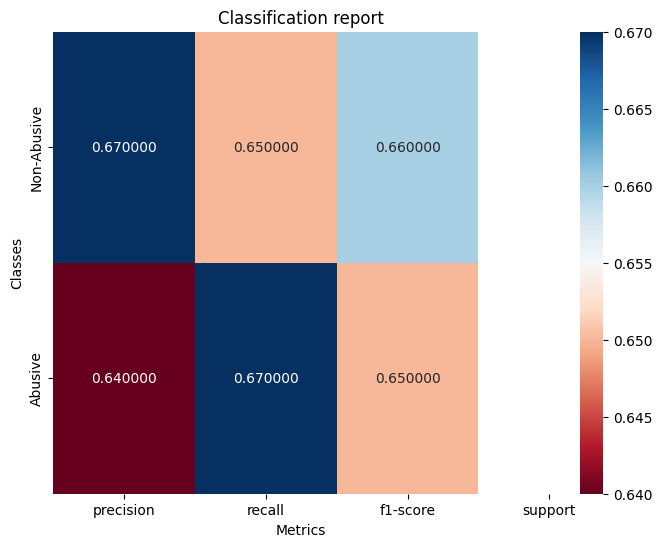

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
Results saved to /content/AWT_results_GRU.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the training data from two CSV files
file_path_1 = '/content/AWM_train.csv'  # Path to first file
file_path_2 = '/content/AWM_dev.csv'  # Path to second file

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine the datasets
df = pd.concat([df1, df2], ignore_index=True)

# Ensure the column names are consistent
df.columns = ['Text', 'Label']  # Adjust if necessary

# Inspect the unique values in the 'Label' column before encoding
print(f"Unique values in 'Label' column before encoding: {df['Label'].unique()}")

# Map the labels to numeric values
df['Label'] = df['Label'].map({'Non-Abusive': 0, 'Abusive': 1})

# Ensure no invalid labels are present after mapping
print(f"Unique values in 'Label' column after encoding: {df['Label'].unique()}")

# Check for missing or invalid values in labels (NaN or any value other than 0 or 1)
invalid_labels = df[df['Label'].isna() | ~df['Label'].isin([0, 1])]
if not invalid_labels.empty:
    print("Invalid labels found:")
    print(invalid_labels)
else:
    print("No invalid labels found.")

# Clean the dataset by dropping rows with invalid or missing labels
df = df.dropna(subset=['Label'])
df = df[df['Label'].isin([0, 1])]

# Split the data into features (X) and target labels (y)
X = df['Text'].values
y = df['Label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert labels to categorical
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Build the GRU Model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(GRU(128, activation='relu', return_sequences=True))
model.add(Dropout(0.5))
model.add(GRU(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with 2 classes

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train_cat,
                    batch_size=32,
                    epochs=10,
                    validation_data=(X_test_pad, y_test_cat))

# Evaluate the model
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate Classification Report
report = classification_report(y_test, y_pred_classes, target_names=['Non-Abusive', 'Abusive'])
print(report)

# Function to Visualize the Classification Report
def plot_classification_report(report, title='Classification report', cmap='RdBu'):
    lines = report.split('\n')

    classes = []
    plotMat = []
    for line in lines[2: (len(lines) - 3)]:
        t = line.split()
        if len(t) < 5:
            continue  # Skip lines that don't have the expected number of elements
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    plt.figure(figsize=(8, 6))
    sns.heatmap(plotMat, annot=True, fmt="f", cmap=cmap, xticklabels=['precision', 'recall', 'f1-score', 'support'], yticklabels=classes)
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.show()

plot_classification_report(report)

# Load the test data for prediction (without labels)
test_file_path = '/content/AWM_test_without_labels.csv'
test_df = pd.read_csv(test_file_path)

# Tokenize and pad sequences for test data
X_test_final_seq = tokenizer.texts_to_sequences(test_df['Text'].values)
X_test_final_pad = pad_sequences(X_test_final_seq, maxlen=max_len)

# Make predictions on the test data
y_test_final_pred = model.predict(X_test_final_pad)
y_test_final_pred_classes = np.argmax(y_test_final_pred, axis=1)

# Map predicted labels to original labels
label_map = {0: 'Non-Abusive', 1: 'Abusive'}
test_df['labels'] = y_test_final_pred_classes
test_df['labels'] = test_df['labels'].map(label_map)

# Save results to a CSV file
output_file_path = '/content/AWT_results_GRU.csv'
test_df.to_csv(output_file_path, index=False)

print(f'Results saved to {output_file_path}')


**LSTM MODEL**

Unique values in 'Label' column before encoding: ['Abusive' 'Non-Abusive']
Unique values in 'Label' column after encoding: [1 0]
No invalid labels found.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 384ms/step - accuracy: 0.5096 - loss: 0.6919 - val_accuracy: 0.6564 - val_loss: 0.6736
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 59s 581ms/step - accuracy: 0.7471 - loss: 17.2317 - val_accuracy: 0.6648 - val_loss: 0.6376
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 54s 272ms/step - accuracy: 0.8334 - loss: 0.6316 - val_accuracy: 0.6311 - val_loss: 0.6283
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 278ms/step - accuracy: 0.8677 - loss: 54.6955 - val_accuracy: 0.5933 - val_loss: 0.6636
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 43s 303ms/step - accuracy: 0.8690 - loss: 0.6149 - val_accuracy: 0.6676 - val_loss: 0.6154
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 55s 457ms/step - accuracy: 0.9436 - loss: 0.3839 - val_accuracy: 0.6522 - val_loss: 0.6193
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 81s 448ms/step - accuracy: 0.9528 - loss: 0.2640 - val_accuracy: 0.6606 - val_loss: 0.6644
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 42s 457ms/step - accuracy: 0.9661 - loss: 0.1823 - val_accuracy: 0.6

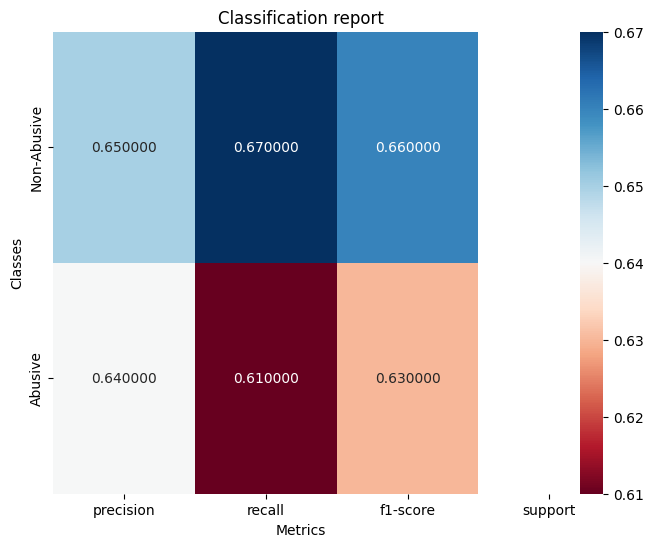

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
Results saved to /content/AWT_results_LSTM.csv


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the training data from two CSV files
file_path_1 = '/content/AWM_train.csv'  # Path to first file
file_path_2 = '/content/AWM_dev.csv'  # Path to second file

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine the datasets
df = pd.concat([df1, df2], ignore_index=True)

# Ensure the column names are consistent
df.columns = ['Text', 'Label']  # Adjust if necessary

# Inspect the unique values in the 'Label' column before encoding
print(f"Unique values in 'Label' column before encoding: {df['Label'].unique()}")

# Map the labels to numeric values
df['Label'] = df['Label'].map({'Non-Abusive': 0, 'Abusive': 1})

# Ensure no invalid labels are present after mapping
print(f"Unique values in 'Label' column after encoding: {df['Label'].unique()}")

# Check for missing or invalid values in labels (NaN or any value other than 0 or 1)
invalid_labels = df[df['Label'].isna() | ~df['Label'].isin([0, 1])]
if not invalid_labels.empty:
    print("Invalid labels found:")
    print(invalid_labels)
else:
    print("No invalid labels found.")

# Clean the dataset by dropping rows with invalid or missing labels
df = df.dropna(subset=['Label'])
df = df[df['Label'].isin([0, 1])]

# Split the data into features (X) and target labels (y)
X = df['Text'].values
y = df['Label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert labels to categorical
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Build the LSTM Model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with 2 classes

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train_cat,
                    batch_size=32,
                    epochs=10,
                    validation_data=(X_test_pad, y_test_cat))

# Evaluate the model
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate Classification Report
report = classification_report(y_test, y_pred_classes, target_names=['Non-Abusive', 'Abusive'])
print(report)

# Function to Visualize the Classification Report
def plot_classification_report(report, title='Classification report', cmap='RdBu'):
    lines = report.split('\n')

    classes = []
    plotMat = []
    for line in lines[2: (len(lines) - 3)]:
        t = line.split()
        if len(t) < 5:
            continue  # Skip lines that don't have the expected number of elements
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    plt.figure(figsize=(8, 6))
    sns.heatmap(plotMat, annot=True, fmt="f", cmap=cmap, xticklabels=['precision', 'recall', 'f1-score', 'support'], yticklabels=classes)
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.show()

plot_classification_report(report)

# Load the test data for prediction (without labels)
test_file_path = '/content/AWM_test_without_labels.csv'
test_df = pd.read_csv(test_file_path)

# Tokenize and pad sequences for test data
X_test_final_seq = tokenizer.texts_to_sequences(test_df['Text'].values)
X_test_final_pad = pad_sequences(X_test_final_seq, maxlen=max_len)

# Make predictions on the test data
y_test_final_pred = model.predict(X_test_final_pad)
y_test_final_pred_classes = np.argmax(y_test_final_pred, axis=1)

# Map predicted labels to original labels
label_map = {0: 'Non-Abusive', 1: 'Abusive'}
test_df['labels'] = y_test_final_pred_classes
test_df['labels'] = test_df['labels'].map(label_map)

# Save results to a CSV file
output_file_path = '/content/AWT_results_LSTM.csv'
test_df.to_csv(output_file_path, index=False)

print(f'Results saved to {output_file_path}')


**Bidirectional LSTM MODEL**

Unique values in 'Label' column before encoding: ['Abusive' 'Non-Abusive']
Unique values in 'Label' column after encoding: [1 0]
No invalid labels found.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


90/90 ━━━━━━━━━━━━━━━━━━━━ 67s 656ms/step - accuracy: 0.5306 - loss: 0.6914 - val_accuracy: 0.5498 - val_loss: 1.8653
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 58s 642ms/step - accuracy: 0.6561 - loss: 298435641344.0000 - val_accuracy: 0.6129 - val_loss: 0.6636
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 640ms/step - accuracy: 0.7768 - loss: 1570744696832.0000 - val_accuracy: 0.5147 - val_loss: 0.7569
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 59s 660ms/step - accuracy: 0.5591 - loss: 34.6314 - val_accuracy: 0.5610 - val_loss: 0.6760
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 81s 653ms/step - accuracy: 0.6624 - loss: 15.6808 - val_accuracy: 0.5877 - val_loss: 0.6630
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 58s 646ms/step - accuracy: 0.7394 - loss: 238218912.0000 - val_accuracy: 0.5119 - val_loss: 273344266240.0000
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 83s 657ms/step - accuracy: 0.5006 - loss: 46921138176.0000 - val_accuracy: 0.4881 - val_loss: 617506752.0000
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 656m

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

 Non-Abusive       0.00      0.00      0.00       365
     Abusive       0.49      1.00      0.66       348

    accuracy                           0.49       713
   macro avg       0.24      0.50      0.33       713
weighted avg       0.24      0.49      0.32       713



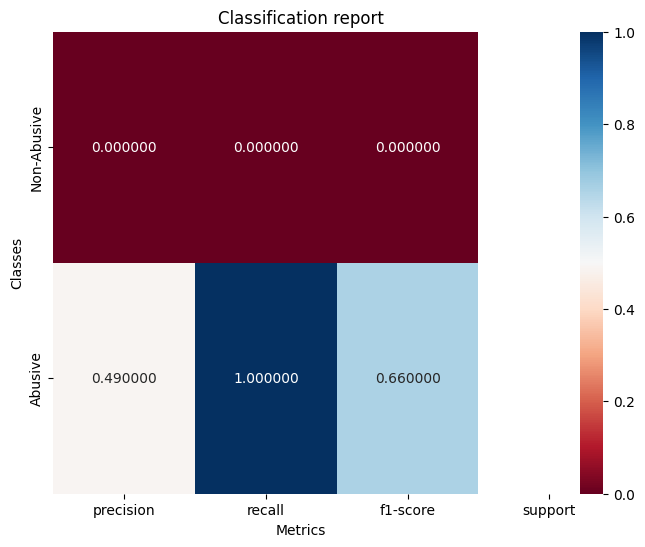

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step
Results saved to /content/AWM_results_Bidirectional_LSTM.csv


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the training data from two CSV files
file_path_1 = '/content/AWM_train.csv'  # Path to first file
file_path_2 = '/content/AWM_dev.csv'  # Path to second file

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine the datasets
df = pd.concat([df1, df2], ignore_index=True)

# Ensure the column names are consistent
df.columns = ['Text', 'Label']  # Adjust if necessary

# Inspect the unique values in the 'Label' column before encoding
print(f"Unique values in 'Label' column before encoding: {df['Label'].unique()}")

# Map the labels to numeric values
df['Label'] = df['Label'].map({'Non-Abusive': 0, 'Abusive': 1})

# Ensure no invalid labels are present after mapping
print(f"Unique values in 'Label' column after encoding: {df['Label'].unique()}")

# Check for missing or invalid values in labels (NaN or any value other than 0 or 1)
invalid_labels = df[df['Label'].isna() | ~df['Label'].isin([0, 1])]
if not invalid_labels.empty:
    print("Invalid labels found:")
    print(invalid_labels)
else:
    print("No invalid labels found.")

# Clean the dataset by dropping rows with invalid or missing labels
df = df.dropna(subset=['Label'])
df = df[df['Label'].isin([0, 1])]

# Split the data into features (X) and target labels (y)
X = df['Text'].values
y = df['Label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert labels to categorical
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Build the Bidirectional LSTM Model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64, activation='relu')))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with 2 classes

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train_cat,
                    batch_size=32,
                    epochs=10,
                    validation_data=(X_test_pad, y_test_cat))

# Evaluate the model
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate Classification Report
report = classification_report(y_test, y_pred_classes, target_names=['Non-Abusive', 'Abusive'])
print(report)

# Function to Visualize the Classification Report
def plot_classification_report(report, title='Classification report', cmap='RdBu'):
    lines = report.split('\n')

    classes = []
    plotMat = []
    for line in lines[2: (len(lines) - 3)]:
        t = line.split()
        if len(t) < 5:
            continue  # Skip lines that don't have the expected number of elements
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    plt.figure(figsize=(8, 6))
    sns.heatmap(plotMat, annot=True, fmt="f", cmap=cmap, xticklabels=['precision', 'recall', 'f1-score', 'support'], yticklabels=classes)
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.show()

plot_classification_report(report)

# Load the test data for prediction (without labels)
test_file_path = '/content/AWM_test_without_labels.csv'
test_df = pd.read_csv(test_file_path)

# Tokenize and pad sequences for test data
X_test_final_seq = tokenizer.texts_to_sequences(test_df['Text'].values)
X_test_final_pad = pad_sequences(X_test_final_seq, maxlen=max_len)

# Make predictions on the test data
y_test_final_pred = model.predict(X_test_final_pad)
y_test_final_pred_classes = np.argmax(y_test_final_pred, axis=1)

# Map predicted labels to original labels
label_map = {0: 'Non-Abusive', 1: 'Abusive'}
test_df['labels'] = y_test_final_pred_classes
test_df['labels'] = test_df['labels'].map(label_map)

# Save results to a CSV file
output_file_path = '/content/AWM_results_Bidirectional_LSTM.csv'
test_df.to_csv(output_file_path, index=False)

print(f'Results saved to {output_file_path}')


**CNN MODEL**

Unique values in 'Label' column before encoding: ['Non-Abusive' 'Abusive']
Unique values in 'Label' column after encoding: [0 1]
No invalid labels found.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.5339 - loss: 0.6935 - val_accuracy: 0.5414 - val_loss: 0.6878
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.6582 - loss: 0.6253 - val_accuracy: 0.6578 - val_loss: 0.6264
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.9433 - loss: 0.1871 - val_accuracy: 0.6592 - val_loss: 0.7600
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.9786 - loss: 0.0579 - val_accuracy: 0.6648 - val_loss: 0.9010
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.9993 - loss: 0.0113 - val_accuracy: 0.6732 - val_loss: 1.0302
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.9991 - loss: 0.0052 - val_accuracy: 0.6732 - val_loss: 1.1586
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.9999 - loss: 0.0022 - val_accuracy: 0.6634 - val_loss: 1.2328
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.6788 - val_loss

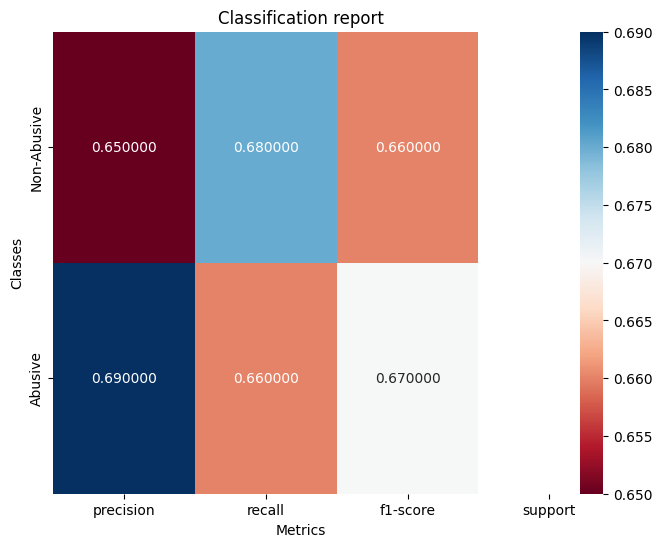

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Results saved to /content/AWM_results_CNN.csv


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the training data from two CSV files
file_path_1 = '/content/AWM_dev.csv'  # Path to first file
file_path_2 = '/content/AWM_train.csv'  # Path to second file

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine the datasets
df = pd.concat([df1, df2], ignore_index=True)

# Ensure the column names are consistent
df.columns = ['Text', 'Label']  # Adjust if necessary

# Inspect the unique values in the 'Label' column before encoding
print(f"Unique values in 'Label' column before encoding: {df['Label'].unique()}")

# Map the labels to numeric values
df['Label'] = df['Label'].map({'Non-Abusive': 0, 'Abusive': 1})

# Ensure no invalid labels are present after mapping
print(f"Unique values in 'Label' column after encoding: {df['Label'].unique()}")

# Check for missing or invalid values in labels (NaN or any value other than 0 or 1)
invalid_labels = df[df['Label'].isna() | ~df['Label'].isin([0, 1])]
if not invalid_labels.empty:
    print("Invalid labels found:")
    print(invalid_labels)
else:
    print("No invalid labels found.")

# Clean the dataset by dropping rows with invalid or missing labels
df = df.dropna(subset=['Label'])
df = df[df['Label'].isin([0, 1])]

# Split the data into features (X) and target labels (y)
X = df['Text'].values
y = df['Label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert labels to categorical
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Build the CNN Model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with 2 classes

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train_cat,
                    batch_size=32,
                    epochs=10,
                    validation_data=(X_test_pad, y_test_cat))

# Evaluate the model
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate Classification Report
report = classification_report(y_test, y_pred_classes, target_names=['Non-Abusive', 'Abusive'])
print(report)

# Function to Visualize the Classification Report
def plot_classification_report(report, title='Classification report', cmap='RdBu'):
    lines = report.split('\n')

    classes = []
    plotMat = []
    for line in lines[2: (len(lines) - 3)]:
        t = line.split()
        if len(t) < 5:
            continue  # Skip lines that don't have the expected number of elements
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    plt.figure(figsize=(8, 6))
    sns.heatmap(plotMat, annot=True, fmt="f", cmap=cmap, xticklabels=['precision', 'recall', 'f1-score', 'support'], yticklabels=classes)
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.show()

plot_classification_report(report)

# Load the test data for prediction (without labels)
test_file_path = '/content/AWM_test_without_labels.csv'
test_df = pd.read_csv(test_file_path)

# Tokenize and pad sequences for test data
X_test_final_seq = tokenizer.texts_to_sequences(test_df['Text'].values)
X_test_final_pad = pad_sequences(X_test_final_seq, maxlen=max_len)

# Make predictions on the test data
y_test_final_pred = model.predict(X_test_final_pad)
y_test_final_pred_classes = np.argmax(y_test_final_pred, axis=1)

# Map predicted labels to original labels
label_map = {0: 'Non-Abusive', 1: 'Abusive'}
test_df['labels'] = y_test_final_pred_classes
test_df['labels'] = test_df['labels'].map(label_map)

# Save results to a CSV file
output_file_path = '/content/AWM_results_CNN.csv'
test_df.to_csv(output_file_path, index=False)

print(f'Results saved to {output_file_path}')


**Fasttext MODEL**

Unique values in 'Label' column before encoding: ['Abusive' 'Non-Abusive']
Unique values in 'Label' column after encoding: [1 0]
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.5071 - loss: 0.6942 - val_accuracy: 0.4895 - val_loss: 0.6984
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5319 - loss: 0.6921 - val_accuracy: 0.5063 - val_loss: 0.6922
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5047 - loss: 0.6943 - val_accuracy: 0.4909 - val_loss: 0.7064
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5424 - loss: 0.6886 - val_accuracy: 0.5203 - val_loss: 0.6907
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5421 - loss: 0.6877 - val_accuracy: 0.4965 - val_loss: 0.7067
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5374 - loss: 0.6891 - val_accuracy: 0.5063 - val_loss: 0.6915
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5618 - loss: 0.6798 - val_accuracy: 0.5077 - val_loss: 0.6943
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5977 - loss: 0.6635 - val_accuracy: 0.6522 - val_loss: 0.

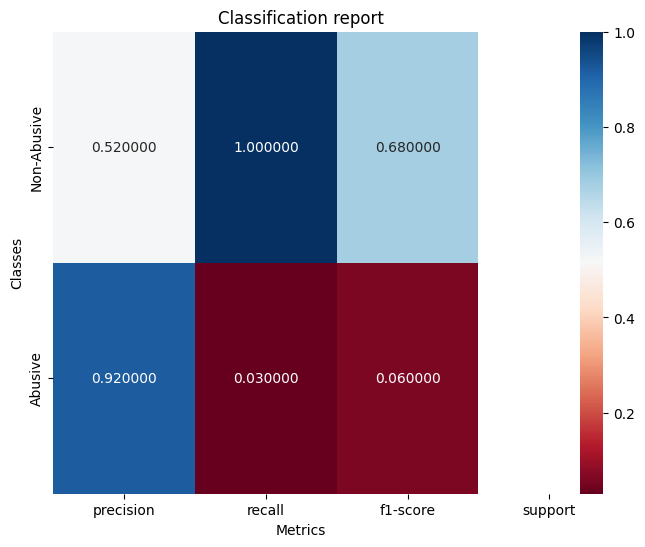

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Results saved to /content/AWM_results_FastText.csv


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Load the training data from two CSV files
file_path_1 = '/content/AWM_train.csv'  # Path to first file
file_path_2 = '/content/AWM_dev.csv'  # Path to second file

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine the datasets
df = pd.concat([df1, df2], ignore_index=True)

# Ensure the column names are consistent
df.columns = ['Text', 'Label']  # Adjust if necessary

# Inspect the unique values in the 'Label' column before encoding
print(f"Unique values in 'Label' column before encoding: {df['Label'].unique()}")

# Map the labels to numeric values
df['Label'] = df['Label'].map({'Non-Abusive': 0, 'Abusive': 1})

# Ensure no invalid labels are present after mapping
print(f"Unique values in 'Label' column after encoding: {df['Label'].unique()}")

# Clean the dataset by dropping rows with invalid or missing labels
df = df.dropna(subset=['Label'])
df = df[df['Label'].isin([0, 1])]

# Split the data into features (X) and target labels (y)
X = df['Text'].values
y = df['Label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert labels to categorical
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Build the FastText Model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(GlobalAveragePooling1D())  # FastText uses global average pooling
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with 2 classes

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train_cat,
                    batch_size=32,
                    epochs=10,
                    validation_data=(X_test_pad, y_test_cat))

# Evaluate the model
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate Classification Report
report = classification_report(y_test, y_pred_classes, target_names=['Non-Abusive', 'Abusive'])
print(report)

# Function to Visualize the Classification Report
def plot_classification_report(report, title='Classification report', cmap='RdBu'):
    lines = report.split('\n')

    classes = []
    plotMat = []
    for line in lines[2: (len(lines) - 3)]:
        t = line.split()
        if len(t) < 5:
            continue  # Skip lines that don't have the expected number of elements
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    plt.figure(figsize=(8, 6))
    sns.heatmap(plotMat, annot=True, fmt="f", cmap=cmap, xticklabels=['precision', 'recall', 'f1-score', 'support'], yticklabels=classes)
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.show()

plot_classification_report(report)

# Load the test data for prediction (without labels)
test_file_path = '/content/AWM_test_without_labels.csv'
test_df = pd.read_csv(test_file_path)

# Tokenize and pad sequences for test data
X_test_final_seq = tokenizer.texts_to_sequences(test_df['Text'].values)
X_test_final_pad = pad_sequences(X_test_final_seq, maxlen=max_len)

# Make predictions on the test data
y_test_final_pred = model.predict(X_test_final_pad)
y_test_final_pred_classes = np.argmax(y_test_final_pred, axis=1)

# Map predicted labels to original labels
label_map = {0: 'Non-Abusive', 1: 'Abusive'}
test_df['labels'] = y_test_final_pred_classes
test_df['labels'] = test_df['labels'].map(label_map)

# Save results to a CSV file
output_file_path = '/content/AWM_results_FastText.csv'
test_df.to_csv(output_file_path, index=False)

print(f'Results saved to {output_file_path}')


**XGBoost MODEL**

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb

# Load the training data from two CSV files
file_path_1 = '/content/AWM_train.csv'  # Path to first file
file_path_2 = '/content/AWM_dev.csv'  # Path to second file

df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Combine the datasets
df = pd.concat([df1, df2], ignore_index=True)

# Ensure the column names are consistent
df.columns = ['Text', 'Label']  # Adjust if necessary

# Normalize label values (convert to lowercase for consistency)
df['Label'] = df['Label'].str.lower()

# Inspect unique values in the 'Label' column before encoding
print(f"Unique values in 'Label' column before encoding: {df['Label'].unique()}")

# Map labels to numeric values
label_mapping = {'non-abusive': 0, 'abusive': 1}
df['Label'] = df['Label'].map(label_mapping)

# Drop rows with missing or invalid labels
df = df.dropna(subset=['Label'])
df = df[df['Label'].isin([0, 1])]

# Split the data into features (X) and target labels (y)
X = df['Text'].values
y = df['Label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data using TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Ensure label consistency
print("Classes in Label Encoder:", label_encoder.classes_)

# Train XGBoost Model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    max_depth=6,
    n_estimators=100,
    learning_rate=0.1,
    eval_metric='logloss'  # Remove 'use_label_encoder'
)

xgb_model.fit(X_train_tfidf, y_train_encoded)

# Make predictions
y_pred = xgb_model.predict(X_test_tfidf)

# Generate classification report
target_names = ['Non-Abusive', 'Abusive']  # Explicit target names
report = classification_report(y_test_encoded, y_pred, target_names=target_names)
print(report)

# Evaluate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Test Accuracy: {accuracy}")

# Load the test data for prediction (without labels)
test_file_path = '/content/AWM_test_without_labels.csv'
test_df = pd.read_csv(test_file_path)

# Tokenize and vectorize test data
X_test_final_tfidf = tfidf.transform(test_df['Text'].values)

# Make predictions on the test data
y_test_final_pred = xgb_model.predict(X_test_final_tfidf)

# Map predicted labels to original labels
label_map = {0: 'Non-Abusive', 1: 'Abusive'}
test_df['Label'] = [label_map[label] for label in y_test_final_pred]

# Save results to a CSV file
output_file_path = '/content/AWM_results_XGBoost.csv'
test_df.to_csv(output_file_path, index=False)

print(f'Results saved to {output_file_path}')


Unique values in 'Label' column before encoding: ['abusive' 'non-abusive']
Classes in Label Encoder: [0 1]
              precision    recall  f1-score   support

 Non-Abusive       0.72      0.58      0.65       365
     Abusive       0.64      0.77      0.70       348

    accuracy                           0.67       713
   macro avg       0.68      0.68      0.67       713
weighted avg       0.68      0.67      0.67       713

Test Accuracy: 0.6732117812061711
Results saved to /content/AWM_results_XGBoost.csv
